In [5]:
import tensorflow as tf
print ('Tensorflow version: ', tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Tensorflow version:  2.1.1


In [6]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

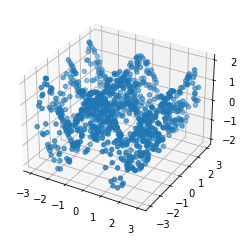

In [7]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [8]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [9]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 720us/sample - loss: 0.9729
Epoch 2/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.9141
Epoch 3/100
1000/1000 [==============================] - 0s 116us/sample - loss: 0.8883
Epoch 4/100
1000/1000 [==============================] - 0s 80us/sample - loss: 0.8701
Epoch 5/100
1000/1000 [==============================] - ETA: 0s - loss: 0.826 - 0s 117us/sample - loss: 0.8292
Epoch 6/100
1000/1000 [==============================] - 0s 101us/sample - loss: 0.7601
Epoch 7/100
1000/1000 [==============================] - 0s 101us/sample - loss: 0.7083
Epoch 8/100
1000/1000 [==============================] - 0s 81us/sample - loss: 0.6616
Epoch 9/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.6310
Epoch 10/100
1000/1000 [==============================] - 0s 105us/sample - loss: 0.6090
Epoch 11/100
1000/1000 [==============================] - 0s 120us/sample - l

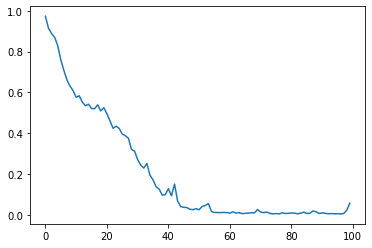

In [11]:
plt.plot(r.history["loss"], label = "loss")

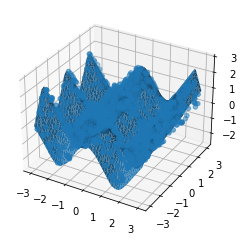

In [12]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

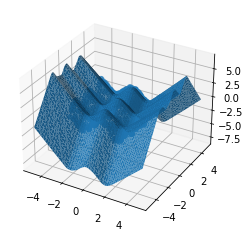

In [13]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()